In [ ]:
'''
Signals Project, Deliverable #1
 
BME 252 - Linear Systems and Signals
 
Sunny Willert 20619549
Vincent Shadbolt 20617236
Samantha Feng 20604727
 
May 25, 2017
 
'''

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import integrate as itg
from scipy import signal
from matplotlib import pyplot as plt

In [5]:
# import data, remove unnecessary cells
# data = pd.read_csv('C:\Users\Sunny\Documents\signals_project\sunny_1.csv', header=0)
data = pd.read_csv('C:\\Users\\Sam\\Documents\\Signals\\sunny_1.csv', header=0)
del data['Unnamed: 7']

# create dataframes for velocity, angles, and distance
int_1 = pd.DataFrame(columns=['time','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'])
int_2 = pd.DataFrame(columns=['time','ax_2','ay_2','az_2'])

# create dataframes for average and maximum values
avg = pd.DataFrame(columns=['a','w','a_1','w_1','a_2','ax','ay','az','wx','wy','wz','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'], 
                      index=['data'])
maxs = pd.DataFrame(columns=['a','w','a_1','w_1','a_2','ax','ay','az','wx','wy','wz','ax_1','ay_1','az_1','wx_1','wy_1','wz_1'], 
                      index=['data'])
plot_maxs = pd.DataFrame(columns=['data', 'time'], 
                      index=['a','w','ax','ay','az','wx','wy','wz'])

In [6]:
# integrate linear acceleration signal for linear velocity signal
# integrate resultant linear velocity signal for linear distance
# integrate angular velocity signal for angle

for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        int_1['{}{}_1'.format(_type, _dir)] = itg.cumtrapz(data['{}{}'.format(_type, _dir)], data['time'])
        int_1['time'] = data['time']
for _dir in ['x', 'y', 'z']:
    int_2['a{}_2'.format(_dir)] = itg.cumtrapz(int_1['a{}_1'.format(_dir)], int_1['time'])
    int_2['time'] = int_1['time']

In [7]:
# determine overall accelerations, angular velocities, velocities, distances, and angles
# take square root of sum of squared vector elements

for _type in ['a', 'w']:
    data['{}'.format(_type)] = np.sqrt(np.square(data['{}x'.format(_type)]) + np.square(data['{}y'.format(_type)]) + np.square(data['{}z'.format(_type)]))
    int_1['{}_1'.format(_type)] = np.sqrt(np.square(int_1['{}x_1'.format(_type)]) + np.square(int_1['{}y_1'.format(_type)]) + np.square(int_1['{}z_1'.format(_type)]))

    if _type == 'a':
        int_2['{}_2'.format(_type)] = np.sqrt(np.square(int_2['{}x_2'.format(_type)]) + np.square(int_2['{}y_2'.format(_type)]) + np.square(int_2['{}z_2'.format(_type)]))

In [8]:
# determine average values of each signal
# determine maximum values of each signal

for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        avg.loc['data', '{}{}'.format(_type, _dir)] = np.mean(np.absolute(data['{}{}'.format(_type, _dir)]))
        avg.loc['data', '{}{}_1'.format(_type, _dir)] = np.mean(np.absolute(int_1['{}{}_1'.format(_type, _dir)]))
        maxs.loc['data', '{}{}'.format(_type, _dir)] = np.max(data['{}{}'.format(_type, _dir)])
        maxs.loc['data', '{}{}_1'.format(_type, _dir)] = np.max(int_1['{}{}_1'.format(_type, _dir)])
        
        avg.loc['data', '{}'.format(_type)] = np.mean(np.absolute(data['{}'.format(_type)]))
        avg.loc['data', '{}_1'.format(_type)] = np.mean(np.absolute(int_1['{}_1'.format(_type)]))
        maxs.loc['data', '{}'.format(_type, _dir)] = np.max(data['{}'.format(_type)])
        maxs.loc['data', '{}_1'.format(_type, _dir)] = np.max(int_1['{}_1'.format(_type)])
        
        if _type == 'a':          
            avg.loc['data', '{}{}_2'.format(_type, _dir)] = np.mean(np.absolute(int_2['{}{}_2'.format(_type, _dir)]))
            maxs.loc['data', '{}{}_2'.format(_type, _dir)] = np.max(int_2['{}{}_2'.format(_type, _dir)])
            
            avg.loc['data', '{}_2'.format(_type)] = np.mean(np.absolute(int_2['{}_2'.format(_type)]))
            maxs.loc['data', '{}_2'.format(_type)]= np.max(int_2['{}_2'.format(_type)])

In [9]:
avg

,a,w,a_1,w_1,a_2,ax,ay,az,wx,wy,wz,ax_1,ay_1,az_1,wx_1,wy_1,wz_1,ax_2,ay_2,az_2
data,14.7778,3.07133,130.627,13.457,2261.96,7.17969,9.40552,5.20617,0.561744,1.5157,2.16695,39.2883,109.394,57.1336,6.62557,11.3189,2.88265,642.85243,1968.913603,905.510487


In [10]:
maxs

,a,w,a_1,w_1,a_2,ax,ay,az,wx,wy,wz,ax_1,ay_1,az_1,wx_1,wy_1,wz_1,ax_2,ay_2,az_2
data,54.2905,13.8498,297.162,28.2912,8238.57,31.96,51.91,17.83,4.0107,8.651,7.3642,116.524,224.496,15.5193,0.238162,0.0661669,1.03734,2477.64985,6988.72467,30.270518


In [11]:
# function that returns maximal value and time of maximal value for a given signal
def find_max(data, label):
    _max = 0
    _time = 0
    
    for idx,row in data.iterrows():
        if row[label] > _max:
            _max = row[label]
            _time = row['time']
            
    return _max, _time

In [12]:
# determine maximal value and time of maximal value for each signal
for _dir in ['x', 'y', 'z']:
    for _type in ['a', 'w']:
        plot_maxs.loc['{}{}'.format(_type, _dir), 'data'], plot_maxs.loc['{}{}'.format(_type, _dir), 'time'] = find_max(data, '{}{}'.format(_type, _dir))
        plot_maxs.loc['{}'.format(_type), 'data'], plot_maxs.loc['{}'.format(_type), 'time'] = find_max(data, '{}'.format(_type, _dir))

In [13]:
plot_maxs

,data,time
a,54.2905,33.424
w,13.8498,43.279
ax,31.96,38.446
ay,51.91,33.424
az,17.83,37.639
wx,4.0107,44.987
wy,8.651,10.036
wz,7.3642,13.071


In [14]:
# find landings by finding local minimal in signal for angular acceleration in the z-axis
indices = signal.find_peaks_cwt(-data['wx'], np.arange(1,650))
indices[:] = [x - 1 for x in indices]
landings = data.loc[indices]
landings = landings[landings['wx'] < -2]

In [15]:
landings

,time,ax,ay,az,wx,wy,wz,a,w
2230,12.325,3.01,10.60,14.86,-4.1492,-0.7819,-1.7449,18.499722,4.568578
3086,17.043,0.89,5.87,-18.66,-4.2035,-3.1542,-5.3327,19.581741,7.487061
4176,23.046,-14.91,5.64,-1.33,-3.5835,-2.4192,-0.3675,15.996456,4.339246
5084,28.053,-27.70,23.41,-2.08,-3.9319,0.0746,-3.4493,36.326912,5.230972
5982,32.998,-11.76,23.42,-15.41,-5.1218,0.7563,-3.7710,30.401679,6.405097
6917,38.144,-2.87,14.11,7.27,-4.4581,0.3494,-2.3596,16.130155,5.056130
7691,42.404,7.39,-5.04,-13.82,-2.9518,-0.4559,-5.3167,16.462263,6.098218
8627,47.574,-13.48,25.31,-0.82,-3.6059,0.0778,-5.5926,28.687609,6.654753
9782,53.924,-10.38,20.79,-1.89,-4.2696,0.1577,-2.4427,23.313957,4.921497


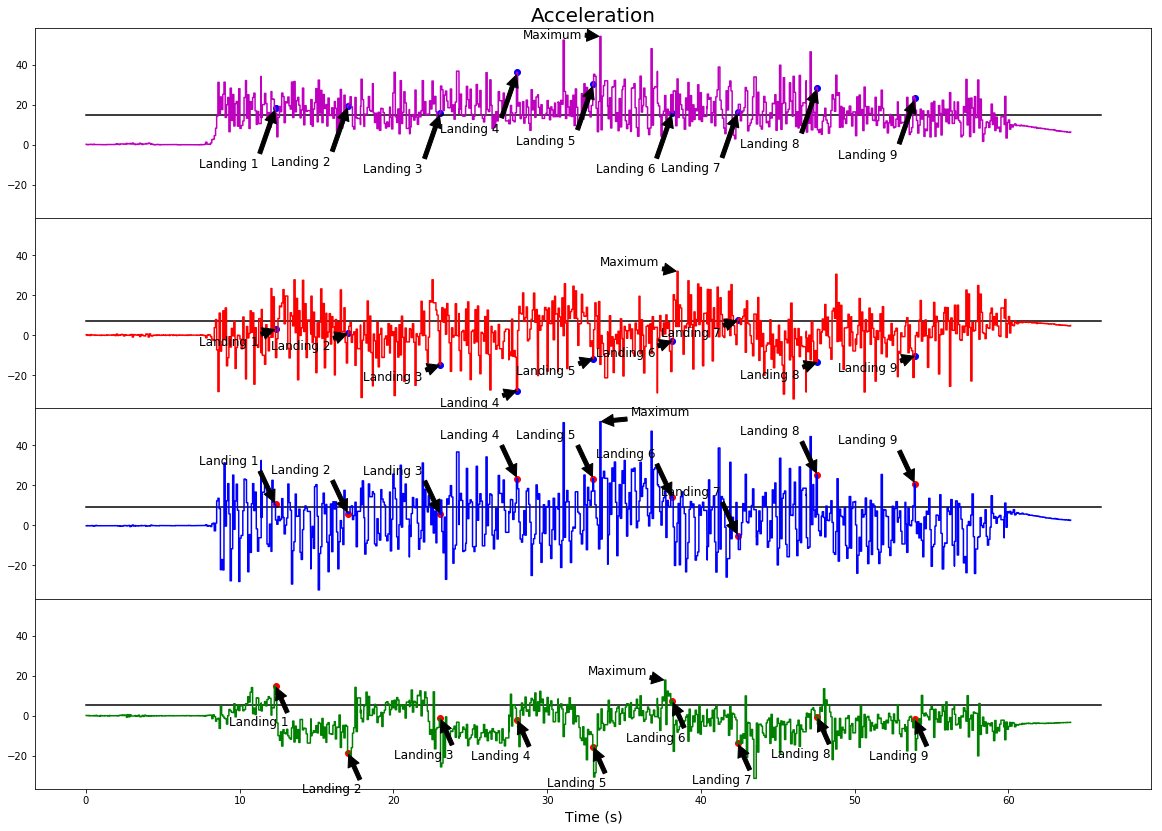

In [34]:
### LINEAR ACCELERATION ###

# create 4 subfigures for acceleration: overall acceleration, as well as acceleration in the x-axis, y-axis, and z-axis
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, sharex=True, sharey=True, figsize=(20,14))

# annotate maximal values for each acceleration graph
for idx,row in plot_maxs.iterrows():
    if idx == 'a':
        ax.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']-1), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    elif idx == 'ax':
        ax1.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']+3), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    elif idx == 'ay':
        ax2.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']+2, row['data']+3), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    elif idx == 'az':
        ax3.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']+3), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# plot and annotate landings for each acceleration graph
ax.plot(landings['time'], landings['a'], 'bo')
ax1.plot(landings['time'], landings['ax'], 'bo')
ax2.plot(landings['time'], landings['ay'], 'ro')
ax3.plot(landings['time'], landings['az'], 'ro')

count = 1
for idx, row in landings.iterrows():
    ax.annotate('Landing {}'.format(count), (row['time'], row['a']), xytext=(row['time']-5, row['a']-30), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax1.annotate('Landing {}'.format(count), (row['time'], row['ax']), xytext=(row['time']-5, row['ax']-8), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax2.annotate('Landing {}'.format(count), (row['time'], row['ay']), xytext=(row['time']-5, row['ay']+20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax3.annotate('Landing {}'.format(count), (row['time'], row['az']), xytext=(row['time']-3, row['az']-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    count += 1

# plot overall acceleration
ax.plot((0,66),(avg['a'], avg['a']), 'k-')
ax.plot(data['time'], data['a'], 'm-')

# plot acceleration in the x-axis
ax1.plot((0,66),(avg['ax'], avg['ax']), 'k-')
ax1.plot(data['time'], data['ax'], 'r-')

# plot acceleration in the y-axis
ax2.plot((0,66),(avg['ay'], avg['ay']), 'k-')
ax2.plot(data['time'], data['ay'], 'b-')

# plot acceleration in the z-axis
ax3.plot((0,66),(avg['az'], avg['az']), 'k-')
ax3.plot(data['time'], data['az'], 'g-')

# format figures
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax.set_title('Acceleration', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()


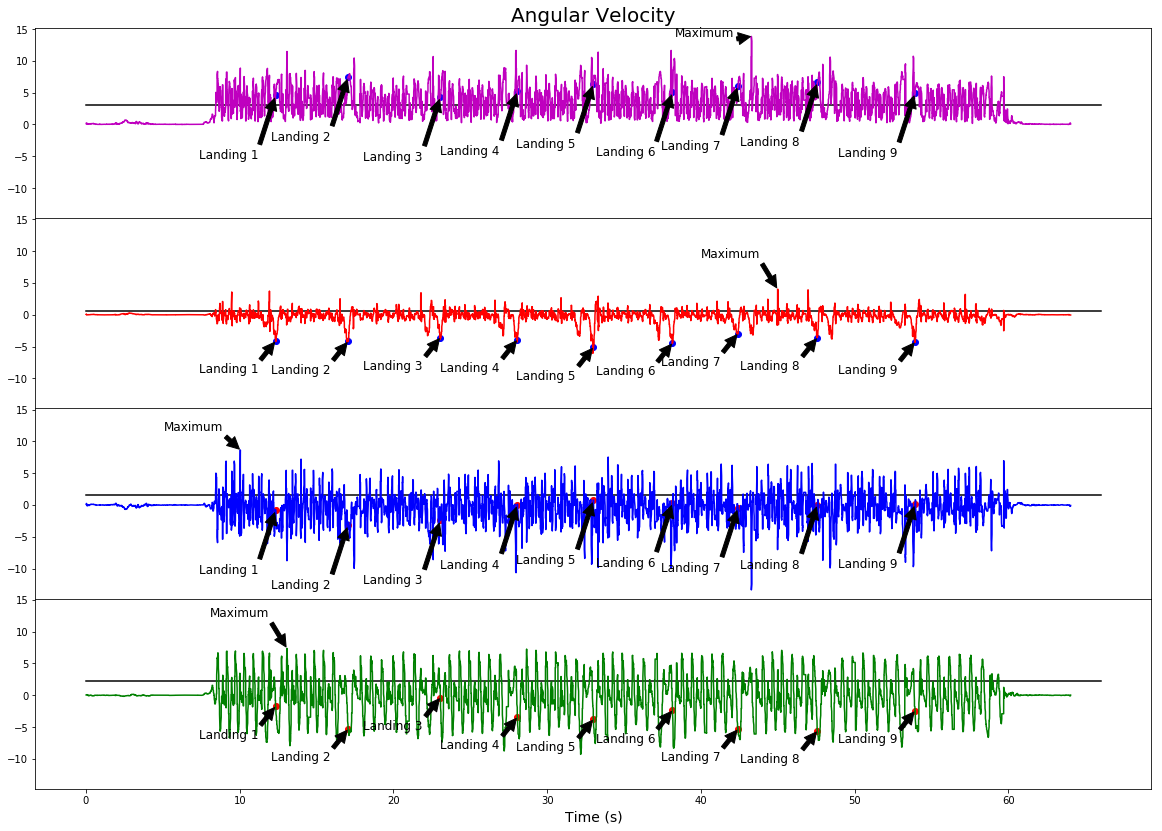

In [27]:
### ANGULAR VELOCItY ###

# create 4 subfigures for angular velocity: overall angular velocity, as well as angular velocity about the x-axis, y-axis, and z-axis
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, sharex=True, sharey=True, figsize=(20,14))

# annotate maximal values for each angular velocigy graph
for idx,row in plot_maxs.iterrows():
    if idx == 'w':
        ax.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    elif idx == 'wx':
        ax1.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']+5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    elif idx == 'wy':
        ax2.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']+3), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    elif idx == 'wz':
        ax3.annotate('Maximum', (row['time'], row['data']), xytext=(row['time']-5, row['data']+5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# plot and annotate landings for each angular velocity graph
ax.plot(landings['time'], landings['w'], 'bo')
ax1.plot(landings['time'], landings['wx'], 'bo')
ax2.plot(landings['time'], landings['wy'], 'ro')
ax3.plot(landings['time'], landings['wz'], 'ro')

count = 1
for idx, row in landings.iterrows():
    ax.annotate('Landing {}'.format(count), (row['time'], row['w']), xytext=(row['time']-5, row['w']-10), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax1.annotate('Landing {}'.format(count), (row['time'], row['wx']), xytext=(row['time']-5, row['wx']-5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax2.annotate('Landing {}'.format(count), (row['time'], row['wy']), xytext=(row['time']-5, row['wy']-10), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax3.annotate('Landing {}'.format(count), (row['time'], row['wz']), xytext=(row['time']-5, row['wz']-5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    count += 1

# plot overall angular velocity 
ax.plot((0,66),(avg['w'], avg['w']), 'k-')
ax.plot(data['time'], data['w'], 'm-')

# plot angular velocity about the x-axis
ax1.plot((0,66),(avg['wx'], avg['wx']), 'k-')
ax1.plot(data['time'], data['wx'], 'r-')

# plot angular velocity about the y-axis
ax2.plot((0,66),(avg['wy'], avg['wy']), 'k-')
ax2.plot(data['time'], data['wy'], 'b-')

# plot angular velocity about the z-axis
ax3.plot((0,66),(avg['wz'], avg['wz']), 'k-')
ax3.plot(data['time'], data['wz'], 'g-')

# format figures
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax.set_title('Angular Velocity', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

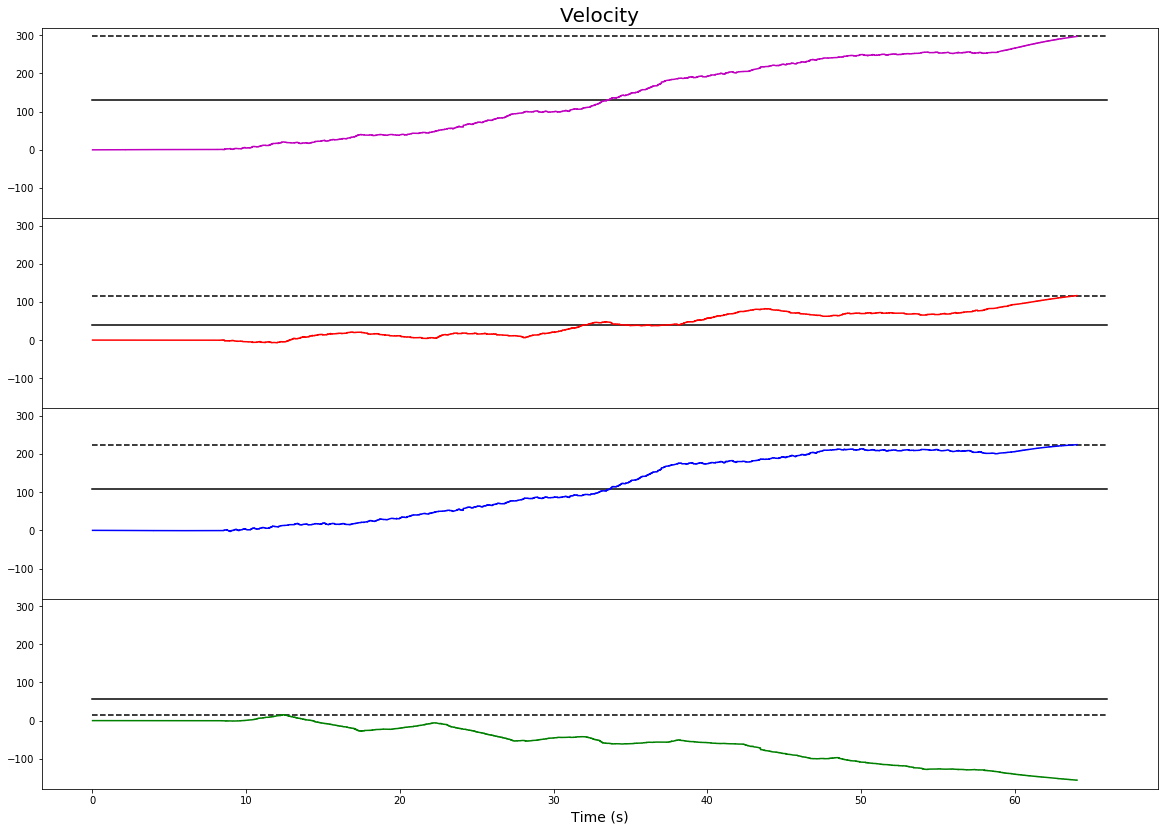

In [28]:
### LINEAR VELOCITY ###

# create 4 subfigures for linear velocity: overall velocity, as well as linear velocity in the x-axis, y-axis, and z-axis
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, sharex=True, sharey=True, figsize=(20,14))

# plot overall linear velocity
ax.plot((0,66),(avg['a_1'], avg['a_1']), 'k-')
ax.plot((0,66),(maxs['a_1'], maxs['a_1']), 'k--')
ax.plot(int_1['time'], int_1['a_1'], 'm-')

# plot linear velocity in the x-axis
ax1.plot((0,66),(avg['ax_1'], avg['ax_1']), 'k-')
ax1.plot((0,66),(maxs['ax_1'], maxs['ax_1']), 'k--')
ax1.plot(int_1['time'], int_1['ax_1'], 'r-')

# plot linear velocity in the y-axis
ax2.plot((0,66),(avg['ay_1'], avg['ay_1']), 'k-')
ax2.plot((0,66),(maxs['ay_1'], maxs['ay_1']), 'k--')
ax2.plot(int_1['time'], int_1['ay_1'], 'b-')

# plot linear velocity in the z-axis
ax3.plot((0,66),(avg['az_1'], avg['az_1']), 'k-')
ax3.plot((0,66),(maxs['az_1'], maxs['az_1']), 'k--')
ax3.plot(int_1['time'], int_1['az_1'], 'g-')

# format figures
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax.set_title('Velocity', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

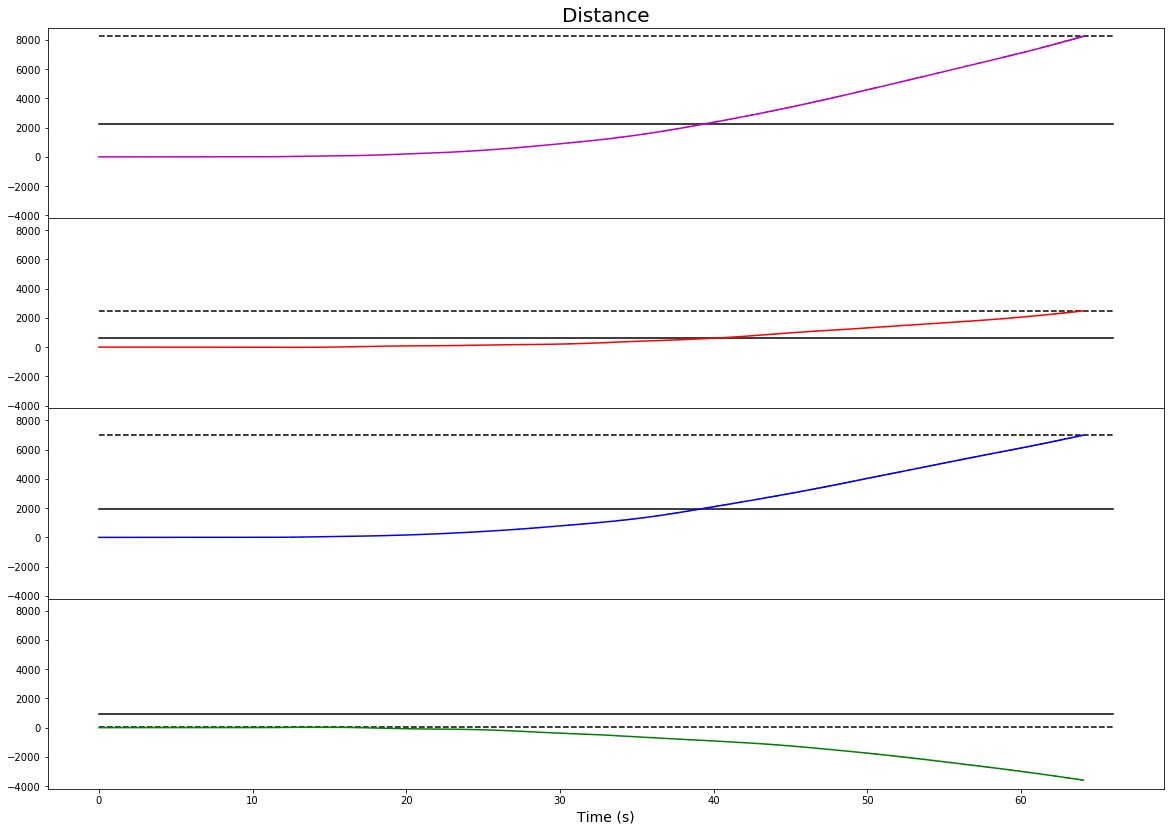

In [31]:
### LINEAR DISTANCE ###

# create 4 subfigures for linear distance: overall distance, as well as linear distance in the x-axis, y-axis, and z-axis
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, sharex=True, sharey=True, figsize=(20,14))

# plot overall distance
ax.plot((0,66),(avg['a_2'], avg['a_2']), 'k-')
ax.plot((0,66),(maxs['a_2'], maxs['a_2']), 'k--')
ax.plot(int_2['time'], int_2['a_2'], 'm-')

# plot distance in the x-axis
ax1.plot((0,66),(avg['ax_2'], avg['ax_2']), 'k-')
ax1.plot((0,66),(maxs['ax_2'], maxs['ax_2']), 'k--')
ax1.plot(int_2['time'], int_2['ax_2'], 'r-')

# plot distance in the y-axis
ax2.plot((0,66),(avg['ay_2'], avg['ay_2']), 'k-')
ax2.plot((0,66),(maxs['ay_2'], maxs['ay_2']), 'k--')
ax2.plot(int_2['time'], int_2['ay_2'], 'b-')

# plot distance in the z-axis
ax3.plot((0,66),(avg['az_2'], avg['az_2']), 'k-')
ax3.plot((0,66),(maxs['az_2'], maxs['az_2']), 'k--')
ax3.plot(int_2['time'], int_2['az_2'], 'g-')

# format figures
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax.set_title('Distance', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()

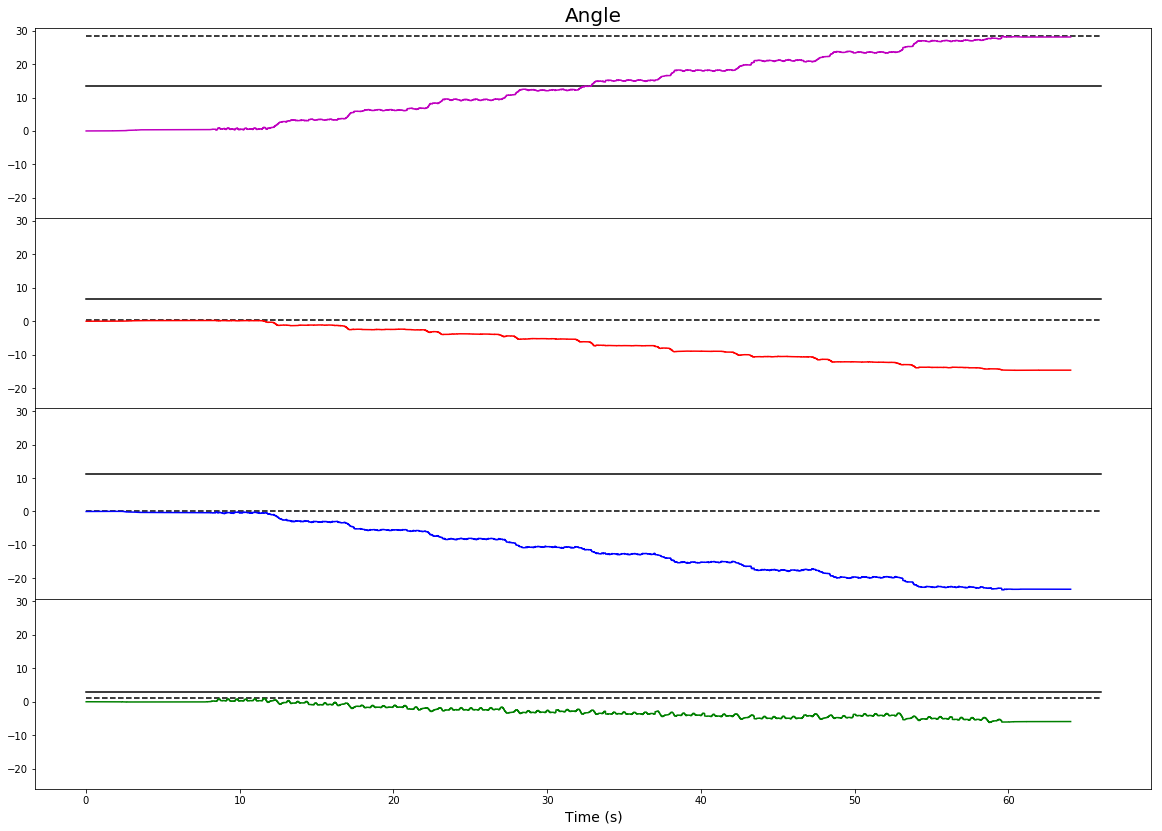

In [30]:
### ANGLE ###

# create 4 subfigures for angle: overall angle, as well as angles about the x-axis, y-axis, and z-axis
fig, (ax, ax1, ax2, ax3) = plt.subplots(4, sharex=True, sharey=True, figsize=(20,14))

# plot overall angle
ax.plot((0,66),(avg['w_1'], avg['w_1']), 'k-')
ax.plot((0,66),(maxs['w_1'], maxs['w_1']), 'k--')
ax.plot(int_1['time'], int_1['w_1'], 'm-')

# plot angles about the x-axis
ax1.plot((0,66),(avg['wx_1'], avg['wx_1']), 'k-')
ax1.plot((0,66),(maxs['wx_1'], maxs['wx_1']), 'k--')
ax1.plot(int_1['time'], int_1['wx_1'], 'r-')

# plot angles about the y-axis
ax2.plot((0,66),(avg['wy_1'], avg['wy_1']), 'k-')
ax2.plot((0,66),(maxs['wy_1'], maxs['wy_1']), 'k--')
ax2.plot(int_1['time'], int_1['wy_1'], 'b-')

# plot angles about the z-axis
ax3.plot((0,66),(avg['wz_1'], avg['wz_1']), 'k-')
ax3.plot((0,66),(maxs['wz_1'], maxs['wz_1']), 'k--')
ax3.plot(int_1['time'], int_1['wz_1'], 'g-')

# format figures
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax.set_title('Angle', fontsize=20)
plt.xlabel('Time (s)', fontsize=14)
plt.show()